In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,0.0,0.0
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,0.0,0.0
2023-03-20 00:00:00-04:00,3917.469971,3956.620117,3916.889893,3951.570068,5347140000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-03-09 00:00:00-05:00', '2023-03-10 00:00:00-05:00',
               '2023-03-13 00:00:00-04:00', '2023-03-14 00:00:00-04:00',
               '2023-03-15 00:00:00-04:00', '2023-03-16 00:00:00-04:00',
               '2023-03-17 00:00:00-04:00', '2023-03-20 00:00:00-04:00',
               '2023-03-21 00:00:00-04:00', '2023-03-22 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23920, freq=None)

<AxesSubplot:xlabel='Date'>

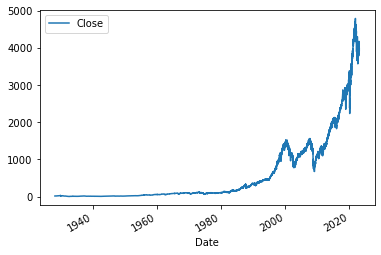

In [6]:
sp500.plot.line(y="Close",use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,3916.639893
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,3951.570068
2023-03-20 00:00:00-04:00,3917.469971,3956.620117,3916.889893,3951.570068,5347140000,4002.870117


In [10]:
sp500["Target"]= (sp500["Tomorrow"]> sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,3916.639893,0
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,3951.570068,1
2023-03-20 00:00:00-04:00,3917.469971,3956.620117,3916.889893,3951.570068,5347140000,4002.870117,1


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,3916.639893,0
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,3951.570068,1
2023-03-20 00:00:00-04:00,3917.469971,3956.620117,3916.889893,3951.570068,5347140000,4002.870117,1


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [18]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [22]:
precision_score(test["Target"],preds)

0.3508771929824561

In [24]:
combined = pd.concat([test["Target"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

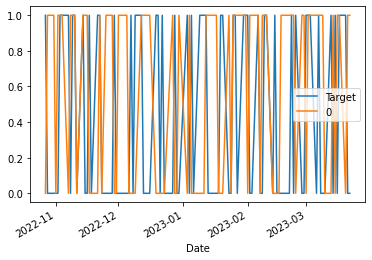

In [25]:
combined.plot()

In [26]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [27]:
def backtest(data,model,predictors,start=2500, step=250):
    all_predictions = []
    
    for i in range(start,data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [28]:
predictions = backtest(sp500,model,predictors)

In [29]:
predictions["Predictions"].value_counts()

0    3406
1    2464
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5271915584415584

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.53356
0    0.46644
Name: Target, dtype: float64

In [32]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column]=sp500["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column]=sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [34]:
sp500 = sp500.dropna()

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 00:00:00-04:00,3876.739990,3894.260010,3838.239990,3891.929932,6594010000,3960.280029,1,0.996497,1.0,1.000656,1.0,0.979029,28.0,0.971182,112.0,1.052853,535.0
2023-03-16 00:00:00-04:00,3878.929932,3964.459961,3864.110107,3960.280029,5695790000,3916.639893,0,1.008705,1.0,1.016037,2.0,0.995772,29.0,0.988683,112.0,1.071008,536.0
2023-03-17 00:00:00-04:00,3958.689941,3958.909912,3901.270020,3916.639893,9354280000,3951.570068,1,0.994460,1.0,1.002011,2.0,0.984391,29.0,0.978322,111.0,1.058891,535.0


In [41]:
model = RandomForestClassifier(n_estimators=400, min_samples_split=10, random_state=1)

In [42]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds>= .6]=1
    preds[preds< .6]=0
    preds = pd.Series(preds, index=test.index,name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [43]:
predictions = backtest(sp500, model, predictors)

In [44]:
predictions["Predictions"].value_counts()

0.0    3893
1.0     976
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5297131147540983